Importy

In [1]:
import numpy as np

from math import log, log2, ceil, pow
from typing import Tuple

Funkcje pomocnicze

In [2]:
def generate_matrix(n_cols: int, n_rows: int):
    # Uniform używa rozkładu jednostajnego ciągłego
    return np.random.uniform(low=0.1, high=0.01, size=(n_rows, n_cols))

In [3]:
generate_matrix(10, 10)

array([[0.08695774, 0.08585244, 0.09494223, 0.04349887, 0.03041832,
        0.05848629, 0.08979435, 0.09591651, 0.03883596, 0.04060396],
       [0.04502956, 0.02393053, 0.05128367, 0.06006192, 0.05913806,
        0.03066251, 0.03700953, 0.03897903, 0.07785051, 0.03003642],
       [0.04413846, 0.0736433 , 0.08070945, 0.04642186, 0.09639202,
        0.04228384, 0.03523928, 0.01201423, 0.09748822, 0.02596892],
       [0.01077626, 0.02653986, 0.08415457, 0.05891151, 0.0752427 ,
        0.02648012, 0.03401242, 0.07216298, 0.05961596, 0.09336895],
       [0.05031897, 0.07129736, 0.01630879, 0.0735406 , 0.08844822,
        0.06270913, 0.04862591, 0.05518252, 0.07767609, 0.07355073],
       [0.07343423, 0.02704952, 0.03167125, 0.03288031, 0.03700345,
        0.05349742, 0.03195585, 0.01598608, 0.09786326, 0.06784279],
       [0.02908788, 0.02433441, 0.08042557, 0.05600084, 0.03143953,
        0.01334667, 0.08659033, 0.07274233, 0.07942405, 0.01299634],
       [0.04361113, 0.01845376, 0.0108009

In [4]:
class Counter:
    """
    Zliczanie wykonywanych operacji zmiennoprzecinkowych
    """
    def __init__(self) -> None:
        self.operation_counter = 0

    @staticmethod
    def count_operations(func):
        def wrapper(self, *args, **kwargs):
            A, B = args
            result = func(self, A, B)
            self.operation_counter += A.size
            return result
        return wrapper
    
    @count_operations
    def add(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A + B

    @count_operations
    def sub(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A - B

    @count_operations
    def mul(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A * B

    @count_operations
    def div(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A / B

    def print_counts(self) -> None:
        print(f"Number of flops: {self.operation_counter}")

Test

In [5]:
counter = Counter()

result = np.zeros([1, 3])

mat1 = np.array([1, 2, 3])
mat2 = np.array([1, 2, 3])
print(mat1)
print(mat2)

result += counter.add(mat1, mat2)

[1 2 3]
[1 2 3]


In [6]:
counter.print_counts()
print(result)

Number of flops: 3
[[2. 4. 6.]]


Funkcje pomocnicze

In [7]:
def resize_matrix_to_2n(A: np.ndarray, B: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Zmiana wielkości macierzy
    """
    size_A: Tuple[int, int] = A.shape
    size_B: Tuple[int, int] = B.shape
    new_height: int = 0
    new_width: int = 0

    # Height
    if size_A[0] > size_B[0]:
        new_height = find_next_power_of_2(size_A[0])
    else:
        new_height = find_next_power_of_2(size_B[0])

    # Width
    if size_A[1] > size_B[1]:
        new_width = find_next_power_of_2(size_A[1])
    else:
        new_width = find_next_power_of_2(size_B[1])

    # Wypełnienie zerami
    new_A = np.pad(
        A, [(0, new_height - size_A[0]), (0, new_width - size_A[1])], mode="constant"
    )
    new_B = np.pad(
        B, [(0, new_height - size_B[0]), (0, new_width - size_B[1])], mode="constant"
    )
    return new_A, new_B

def split(array: np.ndarray, n_rows: int, n_cols: int) -> Tuple:
    """Split a matrix into sub-matrices"""
    r, h = array.shape
    return (
        array.reshape(h // n_rows, n_rows, -1, n_cols)
        .swapaxes(1, 2)
        .reshape(-1, n_rows, n_cols)
    )

def find_next_power_of_2(number: int) -> int:
    """
    Szukanie kolejnej potęgi 2
    """
    return 1 if number == 0 else 2 ** ceil(log2(number))

Metoda tradycyjna

In [8]:
def traditional_method(A: np.ndarray, B: np.ndarray, counter: Counter):
    add = counter.add
    mul = counter.mul
    
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    
    result = np.zeros((rows_A, cols_B))

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] = add(result[i][j], counter.mul(A[i][k], B[k][j]))
    
    return result


In [9]:
A = generate_matrix(5, 5)
B = generate_matrix(5, 5)

print(A)
print(B)

counter = Counter()

result_trad = traditional_method(A, B, counter)
result_numpy = A @ B

print(result_trad)
print(result_numpy)

print(f"Are the results close: {np.allclose(result_trad, result_numpy)}")

[[0.04855961 0.03105826 0.09699787 0.0389771  0.09967896]
 [0.07613016 0.05093171 0.0536556  0.04605713 0.04722536]
 [0.03506217 0.05880191 0.06810251 0.02850539 0.06087481]
 [0.05552594 0.03108757 0.08312046 0.0620705  0.01155764]
 [0.06678588 0.08714924 0.02281616 0.07493892 0.08212529]]
[[0.06654889 0.09547421 0.02665656 0.06103647 0.0515887 ]
 [0.01847471 0.04477185 0.06402244 0.08141209 0.01462639]
 [0.0240637  0.01940221 0.05257262 0.01469354 0.03097232]
 [0.0583318  0.0993184  0.07521664 0.03906312 0.05853528]
 [0.0306506  0.03191347 0.05469306 0.01408798 0.04149185]]
[[0.01146833 0.01496094 0.01676576 0.00984451 0.01238105]
 [0.01143256 0.01667126 0.01415812 0.01204601 0.01098968]
 [0.00858712 0.01207538 0.01375311 0.00989904 0.00897254]
 [0.01024464 0.01483945 0.01314115 0.00972884 0.01000651]
 [0.01349214 0.02078456 0.01868763 0.01559095 0.01322085]]
[[0.01146833 0.01496094 0.01676576 0.00984451 0.01238105]
 [0.01143256 0.01667126 0.01415812 0.01204601 0.01098968]
 [0.0085871

Algorytm Bineta

In [10]:
def binet_core_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    add = counter.add
    mul = counter.mul
    
    if A.size > 1:
        split_at = A.shape[0] // 2
        A11, A12, A21, A22 = split(A, split_at, split_at)
        B11, B12, B21, B22 = split(B, split_at, split_at)

        C11 = add(
            binet_core_algorithm(A11, B11, counter),
            binet_core_algorithm(A12, B21, counter),
        )
        C12 = add(
            binet_core_algorithm(A11, B12, counter),
            binet_core_algorithm(A12, B22, counter),
        )     
        C21 = add(
            binet_core_algorithm(A21, B11, counter),
            binet_core_algorithm(A22, B21, counter),
        )
        
        C22 = add(
            binet_core_algorithm(A21, B12, counter),
            binet_core_algorithm(A22, B22, counter),
        )

        return np.concatenate(
            [np.concatenate([C11, C12], axis=1), np.concatenate([C21, C22], axis=1)],
            axis=0,
        )
    
    else:
        return mul(A, B)

def binet_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    new_A, new_B = resize_matrix_to_2n(A, B)
    C = binet_core_algorithm(new_A, new_B, counter)
    C = C[~np.all(C == 0, axis=1)]
    C = C[:, ~np.all(C == 0, axis=0)]
    return C
    

Test algorytmu Bineta

In [11]:
A = generate_matrix(5, 5)
B = generate_matrix(5, 5)

print(A)
print(B)

counter = Counter()

result_binet = binet_algorithm(A, B, counter)
result_numpy = A @ B

print(result_binet)
print(result_numpy)

print(f"Are the results close: {np.allclose(result_binet, result_numpy)}")

[[0.05798548 0.06763982 0.04872375 0.08230107 0.09715438]
 [0.07552842 0.05311461 0.08813078 0.0825525  0.04521032]
 [0.04791363 0.06551409 0.07701004 0.06839636 0.09625339]
 [0.02269865 0.08412079 0.04217993 0.04745019 0.01825522]
 [0.08563643 0.05744257 0.08413237 0.01029348 0.04214971]]
[[0.06529096 0.02029017 0.09695201 0.02953861 0.02327453]
 [0.04848599 0.08642717 0.08709751 0.03794848 0.09044483]
 [0.01258759 0.05704384 0.02104302 0.06173176 0.09172406]
 [0.09000363 0.02275266 0.03672427 0.07361357 0.05355822]
 [0.04945562 0.08093049 0.06166203 0.09832183 0.03771577]]
[[0.01989105 0.01953716 0.02155155 0.02289831 0.02000855]
 [0.01828192 0.01668753 0.01962276 0.02020924 0.02077205]
 [0.0181904  0.02037335 0.02041895 0.02315414 0.02139771]
 [0.01126515 0.01269401 0.01328321 0.01175445 0.01523536]
 [0.01244646 0.01514681 0.01805319 0.01480506 0.0170465 ]]
[[0.01989105 0.01953716 0.02155155 0.02289831 0.02000855]
 [0.01828192 0.01668753 0.01962276 0.02020924 0.02077205]
 [0.0181904

Algorytm Strassena

In [12]:
def strassen_core_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    add = counter.add
    sub = counter.sub
    mul = counter.mul

    if A.size > 1:
        split_at = A.shape[0] // 2
        A11, A12, A21, A22 = split(A, split_at, split_at)
        B11, B12, B21, B22 = split(B, split_at, split_at)

        P1 = strassen_core_algorithm(add(A11, A22), add(B11, B22), counter)
        P2 = strassen_core_algorithm(add(A21, A22), B11, counter)
        P3 = strassen_core_algorithm(A11, sub(B12, B22), counter)
        P4 = strassen_core_algorithm(A22, sub(B21, B11), counter)
        P5 = strassen_core_algorithm(add(A11, A12), B22, counter)
        P6 = strassen_core_algorithm(sub(A21, A11), add(B11, B12), counter)
        P7 = strassen_core_algorithm(sub(A12, A22), add(B21, B22), counter)

        C11 = add(sub(add(P1, P4), P5), P7)
        C12 = add(P3, P5)
        C21 = add(P2, P4)
        C22 = add(add(sub(P1, P2), P3), P6)

        return np.concatenate(
                    [np.concatenate([C11, C12], axis=1), np.concatenate([C21, C22], axis=1)],
                    axis=0,
                )
    else:
        return mul(A, B)

def strassen_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    new_A, new_B = resize_matrix_to_2n(A, B)
    C = strassen_core_algorithm(new_A, new_B, counter)
    C = C[~np.all(C == 0, axis=1)]
    C = C[:, ~np.all(C == 0, axis=0)]
    return C
    

Test algorytmu Strassena

In [13]:
A = generate_matrix(2, 2)
B = generate_matrix(2, 2)

print(A)
print(B)

counter = Counter()

result_strassen = strassen_algorithm(A, B, counter)
result_numpy = A @ B

print(result_strassen)
print(result_numpy)

print(f"Are the results close: {np.allclose(result_strassen, result_numpy)}")

counter.print_counts()

[[0.02117363 0.02762718]
 [0.02764778 0.04849165]]
[[0.07078834 0.03721121]
 [0.05599179 0.08491284]]
[[0.00304574 0.0031338 ]
 [0.00467227 0.00514637]]
[[0.00304574 0.0031338 ]
 [0.00467227 0.00514637]]
Are the results close: True
Number of flops: 25


In [14]:
import matplotlib.pyplot as plt
from time import time
from matplotlib.ticker import FormatStrFormatter
from typing import List
from tqdm import tqdm

times_trad: List[float] = []
times_binet: List[float] = []
times_strassen: List[float] = []

flops_trad: List[int] = []
flops_binet: List[int] = []
flops_strassen: List[int] = []

power_basis = list(range(2, 10))
powers = [2**k for k in power_basis]

np.random.seed(42)

In [15]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    traditional_method(A, B, counter)

    total_time: float = time() - start_time

    times_trad.append(total_time)
    flops_trad.append(counter.operation_counter)

100%|██████████| 8/8 [03:25<00:00, 25.68s/it]


268435456


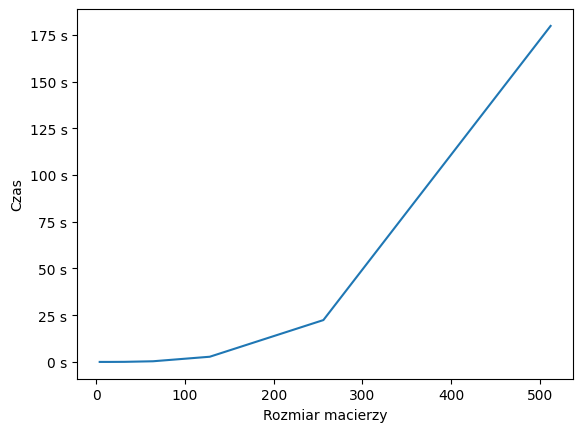

In [16]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_trad)

print(counter.operation_counter)

In [17]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    binet_algorithm(A, B, counter)

    total_time: float = time() - start_time

    times_binet.append(total_time)
    flops_binet.append(counter.operation_counter)

100%|██████████| 8/8 [07:22<00:00, 55.35s/it]


268173312


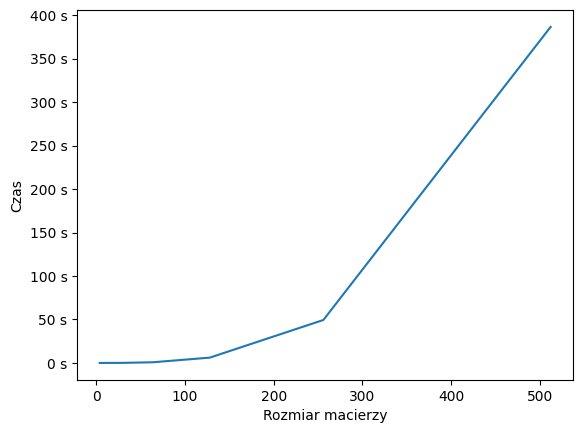

In [18]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_binet)

print(counter.operation_counter)

In [ ]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    strassen_algorithm(A, B, counter)

    total_time: float = time() - start_time

    times_strassen.append(total_time)
    flops_strassen.append(counter.operation_counter)

 88%|████████▊ | 7/8 [00:35<00:06,  6.07s/it]

In [23]:
print(times_strassen)

[247, 2017, 15271, 111505, 798967, 5666497, 247, 2017, 15271, 111505, 798967, 5666497, 39960391, 280902385, 247, 2017, 15271, 111505, 798967, 5666497, 39960391, 280902385]


ValueError: x and y must have same first dimension, but have shapes (8,) and (22,)

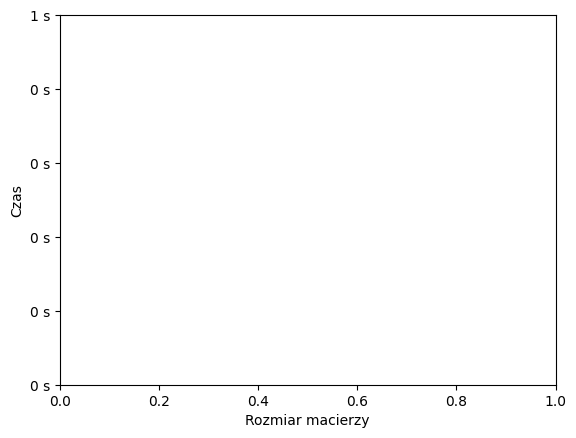

In [25]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_strassen)


In [26]:
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą tradycyjną: {times_trad[-1]:.2f} sekund")
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Bineta: {times_binet[-1]:.2f} sekund")
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Strassena: {times_strassen[-1]:.2f} sekund")

Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą tradycyjną: 177.09 sekund
Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą Bineta: 378.46 sekund
Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą Strassena: 208.07 sekund


In [28]:
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą tradycyjną: {flops_trad[-1]}")
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Bineta {flops_binet[-1]}")
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Strassena {flops_strassen[-1]}")

Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą tradycyjną: 268435456
Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą Bineta 268173312
Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą Strassena <bound method Counter.print_counts of <__main__.Counter object at 0x7f9cc50019c0>>
